<a href="https://colab.research.google.com/github/ououou92/ooo/blob/main/EX03_06_%E5%87%BA%E7%94%9F%E4%BA%BA%E5%8F%A3%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O births.xls https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls

--2025-04-23 09:07:48--  https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297984 (291K) [application/octet-stream]
Saving to: ‘births.xls’

births.xls          100%[===================>] 291.00K  --.-KB/s    in 0.04s   

2025-04-23 09:07:49 (6.76 MB/s) - ‘births.xls’ saved [297984/297984]



In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data = pd.ExcelFile(url)

area = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市']
year = [str(i) for i in range(112, 98, -1)] # 從99年開始縣市合併

df = pd.DataFrame()
for sheet_name in excel_data.sheet_names:
    if sheet_name in year:
        df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
        df_yr = df_yr.iloc[:,0:2] # 只留前二欄：縣市及出生人口數
        df_yr.iloc[:, 0] = df_yr.iloc[:, 0].str.replace(" ", "") # 去除早期資料中縣市名稱中間有空白
        df_yr.columns = ['county','births']
        df_yr = df_yr[df_yr['county'].isin(area)] # 篩選只留下六都的資料
        df_yr.loc[:,'year'] = f'{sheet_name:>03}' # 補足99年數字為三位數
        df = pd.concat([df,df_yr], ignore_index=True)

df

,county,births,year
0,新北市,18157.0,112
1,臺北市,15920.0,112
2,桃園市,17662.0,112
3,臺中市,16813.0,112
4,臺南市,9241.0,112
...,...,...,...
75,新北市,27493,099
76,臺北市,18677,099
77,臺中市,19518,099
78,臺南市,11657,099


##使用 pivot_table 依年份計算出生數的平均值，並繪製折線圖

<Axes: xlabel='year'>

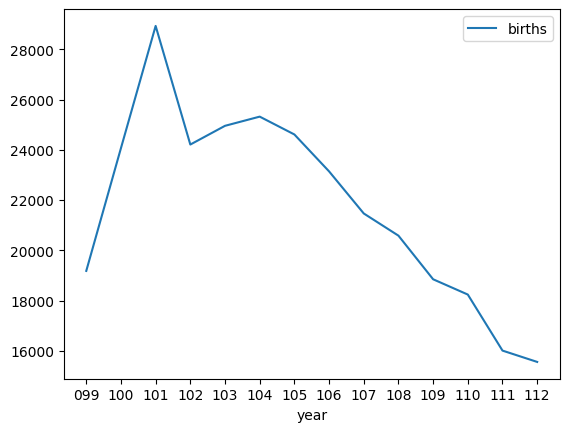

In [ ]:
pvt1 = pd.pivot_table(df, index='year', values='births', aggfunc='mean')

import seaborn as sns
sns.lineplot(data=pvt1)

##使用 pivot_table 依年份觀察各縣市的出生數，並繪製折線圖

<Axes: xlabel='year'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

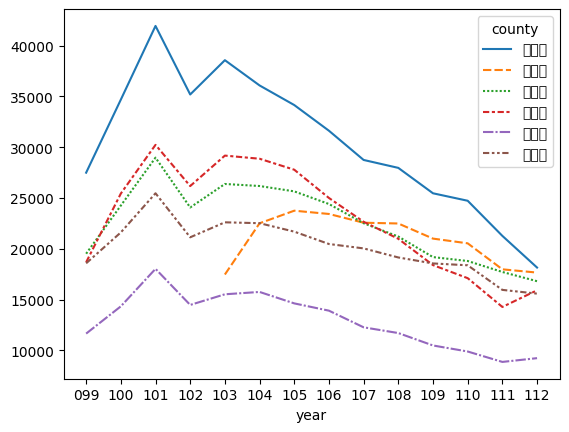

In [ ]:
pvt2 = pd.pivot_table(df, index='year', columns='county', values='births')
sns.lineplot(data=pvt2)

##使用 pivot_table 依縣市觀察平均最大最小出生數，並繪製長條圖

In [ ]:
pvt3 = pd.pivot_table(df, index='county', values='births', aggfunc=['mean','max','min'])
pvt3

,mean,max,min
,births,births,births
county,,,
新北市,30431.642857,41935.0,18157.0
桃園市,20941.7,23752.0,17471.0
臺中市,22549.0,28971.0,16813.0
臺北市,22907.857143,30232.0,14279.0
臺南市,12915.285714,18030.0,8870.0
高雄市,20126.142857,25467.0,15589.0


<Axes: xlabel='county', ylabel="('mean', 'births')">

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

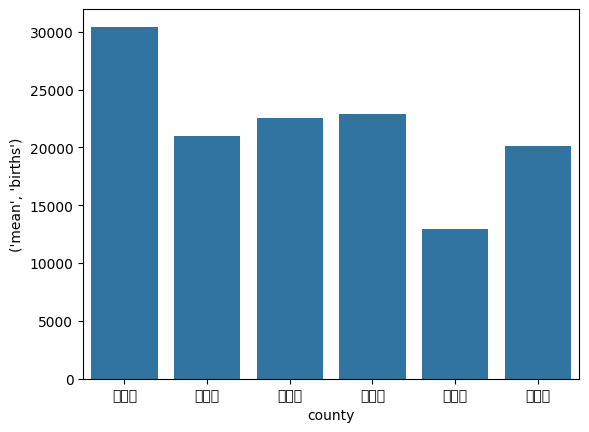

In [ ]:
sns.barplot(data = pvt3, x = 'county', y = ('mean','births'))

##依歷年縣市出生數繪製箱形圖

<Axes: xlabel='county', ylabel='births'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

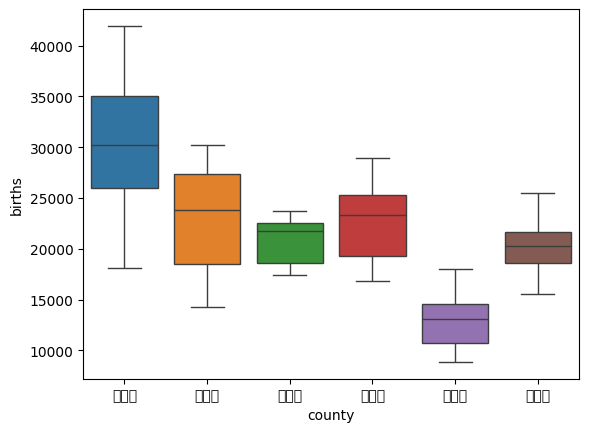

In [ ]:
sns.boxplot(data = df, x = 'county', y = 'births', hue = 'county')